# Run `Background` for multiple targets

In [1]:
import os
import sys
import shutil
import numpy as np
import pandas as pd

In [2]:
sys.path.insert(0, "./results/python")
import background as bg

In [3]:
# Use all the stars with a .txt file in `./data`
starlist = []
for star in os.listdir('./data/'):
    if star.endswith('.txt'):
        starlist.append(star[1:-4])

In [4]:
# Read in list of initial guesses of numax from manual inspection
numaxlist = pd.read_csv('numax_initialguess.csv')

In [5]:
# Set-up names and which background model to fit
prefix = 'W'
resultsubdir = '00'
model_name = 'OneHarvey'

In [6]:
# Create directories
shellscript = 'runBackground' + resultsubdir + '.sh'
errorfile = 'errors_' + resultsubdir + '.txt'

for star in starlist:
    star = prefix + star
    stardir = os.path.join('./data/' + star)
    resultdir = os.path.join('./results/' + star)
    subresultdir = os.path.join(resultdir, resultsubdir)
    if not os.path.exists(stardir):
        print('Creates', stardir)
        os.mkdir(stardir)
    if not os.path.exists(resultdir):
        print('Creates', resultdir)
        os.mkdir(resultdir)
    if not os.path.exists(subresultdir):
        print('Creates', subresultdir)
        os.mkdir(subresultdir)

In [8]:
# Set-up initial background hyperparameter guesses, derived from numax
skipstars = []
print("We have these different guesses", [nl for nl in numaxlist.columns if 'numax' in nl])
for star in starlist:
    starmask = (numaxlist['star'] == prefix + str(star))
    # We have different guesses:
    numax_possibilities = [nl for nl in numaxlist.columns if 'numax' in nl]
    for i, possibility in enumerate(numax_possibilities):
        guess = numaxlist[possibility][starmask].values
        if not np.isnan(guess):
            numax = guess
            break
        else:
            print(f'NaN, {i}, {len(numax_possibilities)}')
            if i == len(numax_possibilities)-1:
                print(f'No guess for {star}, skipping it')
                skipstars.append(star)
                starlist.remove(star)
    bg.set_background_priors(catalog_id=prefix, star_id=star,
                             numax=numax,
                             model_name=model_name, dir_flag=int(subresultdir[-1]))

 ---------------------------------------------- 
 Creating Background priors for W2631
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W1717
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W799
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W2997
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W1165
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W2678
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W1512
 ---------------------------------------------- 
 ---------------------------------------------- 


/home/amalie/Background/./results/python/background.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  boundaries = np.reshape(np.array(boundaries),(int(len(boundaries)/2),2))


 ---------------------------------------------- 
 Creating Background priors for W1356
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W1091
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W3929
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W2577
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W521
 ---------------------------------------------- 
 ---------------------------------------------- 
 Creating Background priors for W3742
 ---------------------------------------------- 
NaN, 0, 3
NaN, 1, 3
 ---------------------------------------------- 
 Creating Background priors for W3284
 ---------------------------------------------- 
 ----------------------------

In [9]:
if len(skipstars) == 0:
    print('All stars have initial guesses')
else:
    print('We are skipping the following stars as they have no guesses of numax')
    for star in skipstars:
        print(prefix + star)

We are skipping the following stars as they have no guesses of numax
W3740
W1820


In [10]:
# We do not want to run each of these fits manually
# Instead here we create a bash script, we can run in the terminal.
# This saves the prints below in an outputted file `runBackground.sh`

# In the terminal, make this file executable by running
# `chmod +x runBackground.sh`

# Afterwards, you can just navigate to your `./build/` directory
# `cd build/`
# and type
# `../runBackground.sh` in the terminal and all the fits will run

# If an error happens and a fit goes not go as intended, then
# the fit will be appended to the file `errors.txt`.
with open(shellscript, "w") as f:
    print("#!/bin/bash", file=f)
    print("""
    f() {
            if ! ./background "$@" ; then
                    echo "[`date`] $@" >> %s
            fi
    }""" % errorfile, file=f)
    print('', file=f)
    for star in starlist:
        print(f"f {prefix} {star} {resultsubdir} {model_name} background_hyperParameters 0.0 0",
              file=f)

# Run the stars and handle errors

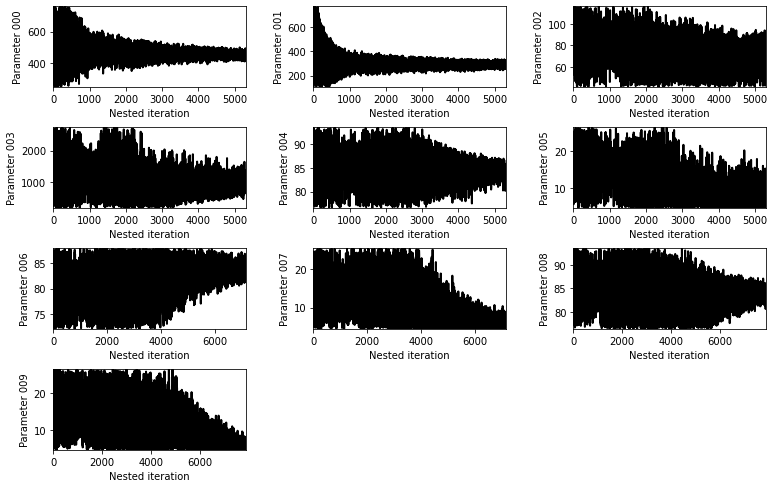

In [11]:
# Here you can see the evolution of the hyperparameters
# through the iterations for a given run
givenstar = '1717'
bg.parameter_evolution(prefix, givenstar, resultsubdir)

# Make the background fitting plots

In [12]:
# Let us figure out which star runs failed
# This takes all the runs in `errors.txt` on a given date.
# Remember to delete/move the file if you are doing different runs or fixing stuff
# Otherwise the star will stay marked
e = np.genfromtxt(os.path.join('./build', errorfile), dtype='unicode')
errorstars = []
for line in e:
    edate = ' '.join(line[0:7])
    eprefix = line[7]
    estar = line[8]
    esubdir = line[9]
    emodel = line[10]
    print(f'Remove {estar} from list of stars')
    errorstars.append(estar)
    starlist.remove(estar)
print(f'This leaves {len(starlist)} stars with a successful fit')

Remove 2631 from list of stars
Remove 799 from list of stars
Remove 1165 from list of stars
Remove 2678 from list of stars
Remove 1225 from list of stars
Remove 1815 from list of stars
Remove 4110 from list of stars
Remove 3012 from list of stars
Remove 2202 from list of stars
Remove 1356 from list of stars
Remove 1091 from list of stars
Remove 521 from list of stars
Remove 3284 from list of stars
Remove 2022 from list of stars
Remove 2792 from list of stars
Remove 1608 from list of stars
Remove 3474 from list of stars
Remove 837 from list of stars
Remove 2342 from list of stars
Remove 3041 from list of stars
Remove 3564 from list of stars
Remove 3079 from list of stars
Remove 4488 from list of stars
Remove 2700 from list of stars
Remove 760 from list of stars
Remove 2034 from list of stars
Remove 2162 from list of stars
This leaves 25 stars with a successful fit


 ----------------------------------------------------------------- 
 The background model adopted for W1717 is OneHarvey
 ----------------------------------------------------------------- 
 ----------------------------------------------------------------- 
 The background model adopted for W2997 is OneHarvey
 ----------------------------------------------------------------- 
 ----------------------------------------------------------------- 
 The background model adopted for W1512 is OneHarvey
 ----------------------------------------------------------------- 
 ----------------------------------------------------------------- 
 The background model adopted for W1912 is OneHarvey
 ----------------------------------------------------------------- 
 ----------------------------------------------------------------- 
 The background model adopted for W3033 is OneHarvey
 ----------------------------------------------------------------- 
 ------------------------------------------------------

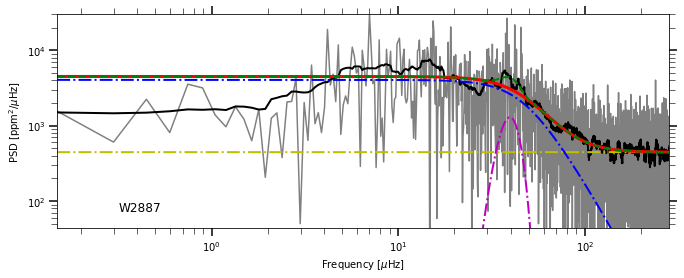

In [13]:
# Make all the plots
for star in starlist:
    bg.background_plot(prefix, star, resultsubdir)

In [44]:
# Make a summary directory
# You can then run `pdfjam --fitpaper true --rotateoversize true *.pdf` and combine them
summarydir = 'summary_' + resultsubdir
summaryfile = 'summary_' + resultsubdir + '.csv'
if not os.path.exists(summarydir):
    print('Creates', summarydir)
    os.mkdir(summarydir)
for star in starlist:
    resultdir = os.path.join('./results/', prefix + star)
    for f in os.listdir(resultdir):
        if f.endswith('Background.pdf'):
            shutil.copy(os.path.join(resultdir, f), os.path.join(summarydir, f))
print('The total number of successes is', len(starlist))

# Make a summary file
allstars = np.sort(np.asarray(starlist + errorstars + skipstars))
success = np.isin(allstars, np.asarray(starlist))
errors = np.isin(allstars, np.asarray(errorstars))
skipped = np.isin(allstars, np.asarray(skipstars))

notecols = [nl for nl in numaxlist.columns if 'notes' in nl]
notes = []
for star in allstars:
    starmask = (numaxlist['star'] == prefix + str(star))
    for ncol in notecols:
        note = numaxlist[ncol][starmask].values
        if not pd.isnull(note):
            notes.append(star)

noted = np.isin(allstars, np.asarray(notes))

df = pd.DataFrame({'star': allstars,
                   'success': success,
                   'error': errors,
                   'skipped': skipped,
                   'noted': noted})
df.to_csv(summaryfile)

The total number of successes is 25


In [45]:
# Which stars should be manually double-checked?
doublecheck = ((df['success'] == False) &
               (df['skipped'] == False) &
               (df['noted'] == False))
print(df['star'][doublecheck])

1     1091
4     1225
8     1608
16    2034
17    2162
19    2342
25    2678
32    3041
34    3079
39    3564
46    4488
52     799
53     837
Name: star, dtype: object


In [46]:
# Stars with no solution and notes
doublecheck = ((df['success'] == False) &
               (df['skipped'] == False) &
               (df['noted'] == True))
print(df['star'][doublecheck])

3     1165
5     1356
11    1815
15    2022
18    2202
23    2631
26    2700
27    2792
30    3012
35    3284
36    3474
44    4110
49     521
50     760
Name: star, dtype: object
